Question 1 : Calculating Circular Orbits

In [69]:
# question 1.1 (conversion factor)

# constants in the CGS system according to the document
PI = 3.14159
G_CGS = 6.67430e-8 # the gravitational constant in CGS system
c_CGS = 2.99792e10 # the speed of light in CGS system
AU_CGS = 1.49598e13 # 1 AU in CGS system
M_CGS = 1.98854e33 # the mass of the sun in CGS system

# ratio between the escape velocities of an object escaping a planet with the mass of the sun and the radius of 1 AU

# NEW velocity to CGS velocity conversion factor, unit of centimeters per second
velocity_conversion_factor_0 = (G_CGS*M_CGS/AU_CGS)**(1/2)/(1*1/1)**(1/2)

# ratio between the periods of an object orbiting a planet with the mass of the sun and the radius of 1 AU

# NEW time to CGS time conversion factor, unit of seconds
time_conversion_factor_0 = (1/velocity_conversion_factor_0)*(AU_CGS/1)

# rescale to units required for the question
velocity_conversion_factor_1 = velocity_conversion_factor_0*(1/(1000/(1/100))) # units to kilometers per second
time_conversion_factor_1 = time_conversion_factor_0 # units not changed (seconds)

print("velocity conversion factor in kilometers per second = ", "{:.11e}".format(velocity_conversion_factor_1))
print("time conversion factor in seconds = ", "{:.11e}".format(time_conversion_factor_1))

velocity conversion factor in kilometers per second =  2.97856535548e+01
time conversion factor in seconds =  5.02248506062e+06


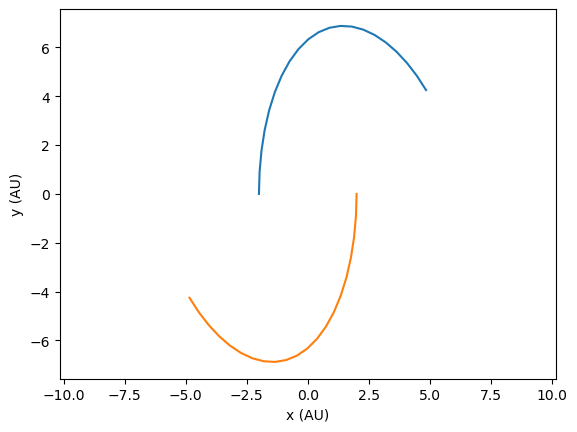

current step =  20
current time =  1.77715167417e+01
current distance between stars =  1.28941904465e+01


In [97]:
# question 1.2 (integrating circular orbit)

# fixed variables
m1, m2, a, e = 1, 1, 2, 0 # 'a' is semi-major axis and 'e' is eccentricity
N_period, N_step = 1/2, 20

# using the method of reduced mass, we can always derive the period of a two-body system
PI = 3.14159
P = (4*PI**2*a**3/(m1+m2))**(1/2)
dt = N_period*P/N_step

# also using the method of reduced mass, we can also derive the velocity of a two-body system
v_0 = ((m1+m2)*(1/a))**(1/2)

# initial condition (idx = 0), position and velocity
(ri0_x, ri0_y) = (-2, 0) # for i
(vi0_x, vi0_y) = (0, v_0) # for i
(rj0_x, rj0_y) = (2, 0) # for j
(vj0_x, vj0_y) = (0, -v_0) # for j

# initial condition (idx = 0), force and first derivative
r = ((ri0_x-rj0_x)**2+(ri0_y-rj0_y)**2)**(1/2)

ai0_x = -(ri0_x-rj0_x)/r**3
ai0_y = -(ri0_y-rj0_y)/r**3
dai0_x = -((vi0_x-vj0_x)/r**3-3*(ri0_x*vi0_x+ri0_y*vi0_y)*(ri0_x-rj0_x)/r**5)
dai0_y = -((vi0_y-vj0_y)/r**3-3*(ri0_x*vi0_x+ri0_y*vi0_y)*(ri0_y-rj0_y)/r**5)

aj0_x = -(rj0_x-ri0_x)/r**3
aj0_y = -(rj0_y-ri0_y)/r**3
daj0_x = -((vj0_x-vi0_x)/r**3-3*(rj0_x*vj0_x+rj0_y*vj0_y)*(rj0_x-ri0_x)/r**5)
daj0_y = -((vj0_y-vi0_y)/r**3-3*(rj0_x*vj0_x+rj0_y*vj0_y)*(rj0_y-ri0_y)/r**5)

# predictor step (idx = p), position and velocity
rip_x = ri0_x + vi0_x*dt + ai0_x*dt**2/2 + dai0_x*dt**3/6 # for i, x-component
rip_y = ri0_y + vi0_y*dt + ai0_y*dt**2/2 + dai0_y*dt**3/6 # for i, y-component

vip_x = vi0_x + ai0_x*dt + dai0_x*dt**2/2 # for i, x-component
vip_y = vi0_y + ai0_y*dt + dai0_y*dt**2/2 # for i, y-component

rjp_x = rj0_x + vj0_x*dt + aj0_x*dt**2/2 + daj0_x*dt**3/6 # for j, x-component
rjp_y = rj0_y + vj0_y*dt + aj0_y*dt**2/2 + daj0_y*dt**3/6 # for j, y-component

vjp_x = vj0_x + aj0_x*dt + daj0_x*dt**2/2
vjp_y = vj0_y + aj0_y*dt + daj0_y*dt**2/2

# predictor step (idx = p), force and first derivative

# derivatives (idx = p)
aip_x = -(rip_x-rjp_x)/r**3 # for i, x-component
aip_y = -(rip_y-rjp_y)/r**3 # for i, y-component
daip_x = -((vip_x-vjp_x)/r**3-3*(rip_x*vip_x+rip_y*vip_y)*(rip_x-rjp_x)/r**5) # for i, x-component
daip_y = -((vip_y-vjp_y)/r**3-3*(rip_x*vip_x+rip_y*vip_y)*(rip_y-rjp_y)/r**5) # for i, y-component

ajp_x = (rip_x-rjp_x)/r**3 # for j, x-component
ajp_y = (rip_y-rjp_y)/r**3 # for j, y-component
dajp_x = ((vip_x-vjp_x)/r**3-3*(rip_x*vip_x+rip_y*vip_y)*(rip_x-rjp_x)/r**5) # for j, x-component
dajp_y = ((vip_y-vjp_y)/r**3-3*(rip_x*vip_x+rip_y*vip_y)*(rip_y-rjp_y)/r**5) # for j, y-component

# the corrector step (idx = 1), second, and fourth derivative

# derivatives (idx = 0)
ddai0_x = -6*(ai0_x-aip_x)/dt**2-2*(2*dai0_x+daip_x)/dt # for i, x-component
ddai0_y = -6*(ai0_y-aip_y)/dt**2-2*(2*dai0_y+daip_y)/dt # for i, y-component
dddai0_x = 12*(ai0_x-aip_x)/dt**3+6*(dai0_x+daip_x)/dt**2 # for i, x-component
dddai0_y = 12*(ai0_y-aip_y)/dt**3+6*(dai0_y+daip_y)/dt**2 # for i, y-component

ddaj0_x = -6*(aj0_x-ajp_x)/dt**2-2*(2*daj0_x+dajp_x)/dt # for j, x-component
ddaj0_y = -6*(aj0_y-ajp_y)/dt**2-2*(2*daj0_y+dajp_y)/dt # for j, y-component
dddaj0_x = 12*(aj0_x-ajp_x)/dt**3+6*(daj0_x+dajp_x)/dt**2 # for j, x-component
dddaj0_y = 12*(aj0_y-ajp_y)/dt**3+6*(daj0_y+dajp_y)/dt**2 # for j, y-component

# correction (idx = 1)
ri1_x = rip_x + ddai0_x*dt**4/24 + dddai0_x*dt**5/120 # for i, x-component
ri1_y = rip_y + ddai0_y*dt**4/24 + dddai0_y*dt**5/120 # for i, y-component
vi1_x = vip_x + ddai0_x*dt**3/6 + dddai0_x*dt**4/24 # for i, x-component
vi1_y = vip_y + ddai0_y*dt**3/6 + dddai0_y*dt**4/24 # for i, y-component

rj1_x = rjp_x + ddaj0_x*dt**4/24 + dddaj0_x*dt**5/120 # for j, x-component
rj1_y = rjp_y + ddaj0_y*dt**4/24 + dddaj0_y*dt**5/120 # for j, y-component
vj1_x = vjp_x + ddaj0_x*dt**3/6 + dddaj0_x*dt**4/24 # for j, x-component
vj1_y = vjp_y + ddaj0_y*dt**3/6 + dddaj0_y*dt**4/24 # for j, y-component

# for listing
ri_x_list = []
ri_y_list = []
rj_x_list = []
rj_y_list = []

# loop
ri_x_list.append(ri0_x) # for 0th step
ri_y_list.append(ri0_y) # for 0th step
rj_x_list.append(rj0_x) # for 0th step
rj_y_list.append(rj0_y) # for 0th step 

for N in range(N_step):
    # initial condition (idx = 0), force and first derivative
    r = ((ri0_x-rj0_x)**2+(ri0_y-rj0_y)**2)**(1/2)

    ai0_x = -(ri0_x-rj0_x)/r**3
    ai0_y = -(ri0_y-rj0_y)/r**3
    dai0_x = -((vi0_x-vj0_x)/r**3-3*(ri0_x*vi0_x+ri0_y*vi0_y)*(ri0_x-rj0_x)/r**5)
    dai0_y = -((vi0_y-vj0_y)/r**3-3*(ri0_x*vi0_x+ri0_y*vi0_y)*(ri0_y-rj0_y)/r**5)

    aj0_x = -(rj0_x-ri0_x)/r**3
    aj0_y = -(rj0_y-ri0_y)/r**3
    daj0_x = -((vj0_x-vi0_x)/r**3-3*(rj0_x*vj0_x+rj0_y*vj0_y)*(rj0_x-ri0_x)/r**5)
    daj0_y = -((vj0_y-vi0_y)/r**3-3*(rj0_x*vj0_x+rj0_y*vj0_y)*(rj0_y-ri0_y)/r**5)

    # predictor step (idx = p), position and velocity
    rip_x = ri0_x + vi0_x*dt + ai0_x*dt**2/2 + dai0_x*dt**3/6 # for i, x-component
    rip_y = ri0_y + vi0_y*dt + ai0_y*dt**2/2 + dai0_y*dt**3/6 # for i, y-component

    vip_x = vi0_x + ai0_x*dt + dai0_x*dt**2/2 # for i, x-component
    vip_y = vi0_y + ai0_y*dt + dai0_y*dt**2/2 # for i, y-component

    rjp_x = rj0_x + vj0_x*dt + aj0_x*dt**2/2 + daj0_x*dt**3/6 # for j, x-component
    rjp_y = rj0_y + vj0_y*dt + aj0_y*dt**2/2 + daj0_y*dt**3/6 # for j, y-component

    vjp_x = vj0_x + aj0_x*dt + daj0_x*dt**2/2
    vjp_y = vj0_y + aj0_y*dt + daj0_y*dt**2/2

    # predictor step (idx = p), force and first derivative

    # derivatives (idx = p)
    aip_x = -(rip_x-rjp_x)/r**3 # for i, x-component
    aip_y = -(rip_y-rjp_y)/r**3 # for i, y-component
    daip_x = -((vip_x-vjp_x)/r**3-3*(rip_x*vip_x+rip_y*vip_y)*(rip_x-rjp_x)/r**5) # for i, x-component
    daip_y = -((vip_y-vjp_y)/r**3-3*(rip_x*vip_x+rip_y*vip_y)*(rip_y-rjp_y)/r**5) # for i, y-component

    ajp_x = (rip_x-rjp_x)/r**3 # for j, x-component
    ajp_y = (rip_y-rjp_y)/r**3 # for j, y-component
    dajp_x = ((vip_x-vjp_x)/r**3-3*(rip_x*vip_x+rip_y*vip_y)*(rip_x-rjp_x)/r**5) # for j, x-component
    dajp_y = ((vip_y-vjp_y)/r**3-3*(rip_x*vip_x+rip_y*vip_y)*(rip_y-rjp_y)/r**5) # for j, y-component

    # derivatives (idx = n-1)
    ddai0_x = -6*(ai0_x-aip_x)/dt**2-2*(2*dai0_x+daip_x)/dt # for i, x-component
    ddai0_y = -6*(ai0_y-aip_y)/dt**2-2*(2*dai0_y+daip_y)/dt # for i, y-component
    dddai0_x = 12*(ai0_x-aip_x)/dt**3+6*(dai0_x+daip_x)/dt**2 # for i, x-component
    dddai0_y = 12*(ai0_y-aip_y)/dt**3+6*(dai0_y+daip_y)/dt**2 # for i, y-component

    ddaj0_x = -6*(aj0_x-ajp_x)/dt**2-2*(2*daj0_x+dajp_x)/dt # for j, x-component
    ddaj0_y = -6*(aj0_y-ajp_y)/dt**2-2*(2*daj0_y+dajp_y)/dt # for j, y-component
    dddaj0_x = 12*(aj0_x-ajp_x)/dt**3+6*(daj0_x+dajp_x)/dt**2 # for j, x-component
    dddaj0_y = 12*(aj0_y-ajp_y)/dt**3+6*(daj0_y+dajp_y)/dt**2 # for j, y-component

    # correction (idx = n)
    rin_x = rip_x + ddai0_x*dt**4/24 + dddai0_x*dt**5/120 # for i, x-component
    rin_y = rip_y + ddai0_y*dt**4/24 + dddai0_y*dt**5/120 # for i, y-component
    vin_x = vip_x + ddai0_x*dt**3/6 + dddai0_x*dt**4/24 # for i, x-component
    vin_y = vip_y + ddai0_y*dt**3/6 + dddai0_y*dt**4/24 # for i, y-component

    rjn_x = rjp_x + ddaj0_x*dt**4/24 + dddaj0_x*dt**5/120 # for j, x-component
    rjn_y = rjp_y + ddaj0_y*dt**4/24 + dddaj0_y*dt**5/120 # for j, y-component
    vjn_x = vjp_x + ddaj0_x*dt**3/6 + dddaj0_x*dt**4/24 # for j, x-component
    vjn_y = vjp_y + ddaj0_y*dt**3/6 + dddaj0_y*dt**4/24 # for j, y-component

    # saving information in a list
    ri_x_list.append(rin_x) # for n-th step
    ri_y_list.append(rin_y) # for n-th step
    rj_x_list.append(rjn_x) # for n-th step
    rj_y_list.append(rjn_y) # for n-th step 

    # updating quantites
    (ri0_x, ri0_y) = (rin_x, rin_y) # for i
    (vi0_x, vi0_y) = (vin_x, vin_y) # for i
    (rj0_x, rj0_y) = (rjn_x, rjn_y) # for j
    (vj0_x, vj0_y) = (vjn_x, vjn_y) # for j

    # print(ri0_x, ri0_y, rj0_x, rj0_y)

# values in the N-th step
(riN_x, riN_y) = (ri0_x, ri0_y) # for i
(viN_x, viN_y) = (vi0_x, vi0_y) # for i
(rjN_x, rjN_y) = (rj0_x, rj0_y) # for j
(vjN_x, vjN_y) = (vj0_x, vj0_y) # for j

# plotting the results (optional)
import pylab 
pylab.plot(ri_x_list,ri_y_list)
pylab.plot(rj_x_list,rj_y_list)
pylab.axis("equal")
pylab.xlabel("x (AU)")
pylab.ylabel("y (AU)")
pylab.show()

print("current step = ", int(N_step))
print("current time = ", "{:.11e}".format(number_of_periods*P))
print("current distance between stars = ", "{:.11e}".format(((riN_x-rjN_x)**2+(riN_y-rjN_y)**2)**(1/2)))

In [ ]:
# question 1.3 (orbit integration)

In [ ]:
# question 1.4 ()